In [22]:
# establish / import dependencies
import pandas as pd
import numpy as np
import json
import requests
import citipy 
from citipy import citipy

from config import  weather_key

openweather_url = "http://api.openweathermap.org/data/2.5/weather?"

In [47]:
# getting rand floats for city coordinates
lat = np.random.uniform(-90, 90,2000) 
long = np.random.uniform(-180, 180,2000)

# add these to dataframe to be referenced as city locations
coordinates = pd.DataFrame()
coordinates['Latitude'] = lat
coordinates['Longitude'] = long

coordinates.head()

,Latitude,Longitude
0,6.248718,-103.335431
1,-6.867744,145.059909
2,44.707364,-139.608839
3,12.857082,-58.579238
4,18.540157,125.832240


In [24]:
# # # FIX WEATHER KEY # # #
weather_key = "1061798183431c6ae7b90013fd8b60e9"


In [54]:
# getting city names from the dataframe of random geograpgical locations
cities_pd = pd.DataFrame()

cities = []

# loop through all coordinates and find city name
for index, row in coordinates.iterrows():

    lat = row['Latitude']
    long = row['Longitude']

    city = citipy.nearest_city(lat,long)
    city_name = city.city_name
    
    if city not in cities:
        cities.append(city)
    
    # add the cities to a dataframe 
    cities_pd.loc[index,"City"] = city_name
    cities_pd.loc[index,"Latitude"] = lat
    cities_pd.loc[index,"Longitude"] = long

cities_pd = cities_pd.drop_duplicates()
print(len(cities_pd['City']))

2000


In [26]:
# loop through all cities, call API and pull weather data

# empty array for data
city_data = []


for index,row in cities_pd.iterrows():
    city = row["City"]
    
    # unique city search url
    query_url = openweather_url + "appid=" + weather_key + "&q=" + city

    # try/except to pass any cities not found
    try:
        city_weather = requests.get(query_url).json()
        
        city_id = city_weather["sys"]["id"]
        lat = city_weather["coord"]["lat"]
        lng = city_weather["coord"]["lon"]
        temp = city_weather["main"]["temp"]
        humidity = city_weather["main"]["humidity"]
        clouds = city_weather["clouds"]["all"]
        wind = city_weather["wind"]["speed"]
        country = city_weather["sys"]["country"]
        weather_description = city_weather["weather"][0]["description"]       
            
            # add the weather data into city_data list
        city_data.append({"City": city.title(),
                          "City ID": city_id, 
                          "Latitude": lat, 
                          "Longitude": lng, 
                          "Temperature": temp,
                          "Weather Description": weather_description,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind,
                          "Country": country})
    # If an error is experienced, skip the city

    except:
        print(f"{city} not found.")
        pass

chuy not found.
kiunga not found.
yarovoye not found.
pokhara not found.
hithadhoo not found.
nizwa not found.
sterlibashevo not found.
hithadhoo not found.
guerrero negro not found.
viedma not found.
qaanaaq not found.
malmyzh not found.
ternate not found.
catuday not found.
rikitea not found.
kidal not found.
te anau not found.
kavaratti not found.
rikitea not found.
qaanaaq not found.
omboue not found.
upernavik not found.
amderma not found.
nanortalik not found.
qaanaaq not found.
kaitangata not found.
kargasok not found.
cherskiy not found.
nguiu not found.
chifeng not found.
cherskiy not found.
ekibastuz not found.
porto novo not found.
roebourne not found.
amderma not found.
cherskiy not found.
chara not found.
taolanaro not found.
upernavik not found.
port alfred not found.
rikitea not found.
polewali not found.
amderma not found.
amazar not found.
qaanaaq not found.
alihe not found.
okha not found.
dikson not found.
port alfred not found.
illoqqortoormiut not found.
kungurtug 

In [27]:
# convert the results of the API loop into a dataframe 
city_data_df = pd.DataFrame(city_data)

print(len(city_data_df['City']))
city_data_df = city_data_df.drop_duplicates()
print(len(city_data_df['City']))

# correct the units of temperature to Fahrenheit and wind speed to mph
city_data_df['Temperature'] = (city_data_df['Temperature']-273.15) * (9/5) + 32
city_data_df['Wind Speed'] = (city_data_df['Wind Speed'] * 2.23694)

# for some reason citipy produces up to 60% duplicate cities

971
329


In [15]:
# import dependencies and modules for plotting
import matplotlib
from matplotlib import pyplot as plt
from scipy import  stats

# establish plot-able data variables
temperature = city_data_df['Temperature']
humidity = city_data_df['Humidity']
cloud_cover = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']
latitude = city_data_df['Latitude']



Text(0.5, 1.0, 'Temperature vs. Latitude')

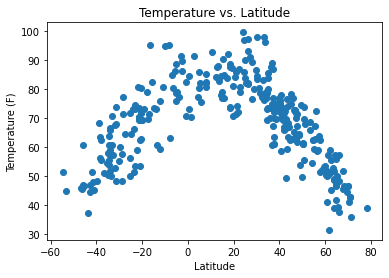

In [16]:
# Temperature vs. Latitude
lat_labels = np.arange(-90,90,10)
plt.scatter(latitude,temperature)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs. Latitude')

Text(0.5, 1.0, 'Humidity vs. Latitude')

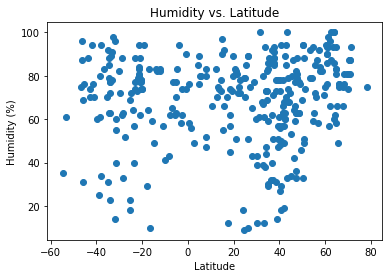

In [17]:
# Humidity vs. Latitude
lat_labels = np.arange(-90,90,10)
plt.scatter(latitude,humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs. Latitude')

Text(0.5, 1.0, 'Cloud Cover vs. Latitude')

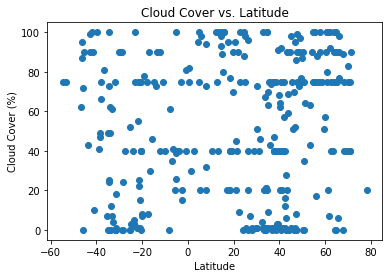

In [18]:
# cloud cover vs latitude
lat_labels = np.arange(-90,90,10)
plt.scatter(latitude,cloud_cover)
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover (%)')
plt.title('Cloud Cover vs. Latitude')

Text(0.5, 1.0, 'Wind Speed(mph) vs. Latitude')

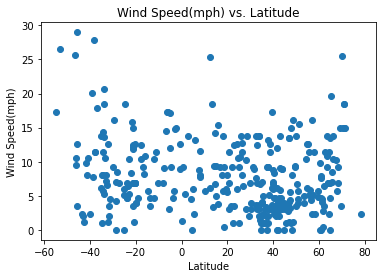

In [19]:
# wind speed vs latitude
lat_labels = np.arange(-90,90,10)
plt.scatter(latitude,wind_speed)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('Wind Speed(mph) vs. Latitude')